/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.9500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


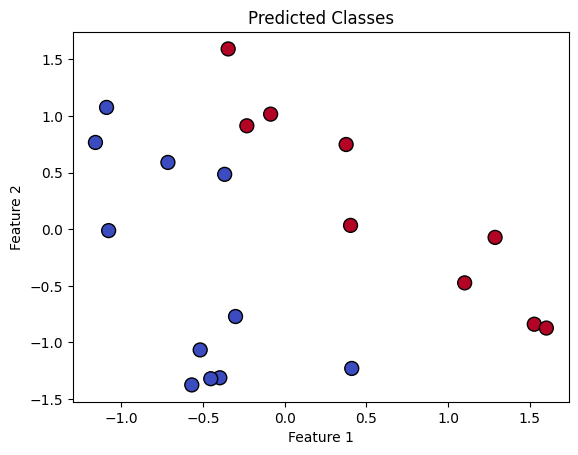

In [21]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if sum of coordinates > 1, else Class 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model using Keras
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Visualize the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes.flatten(), cmap='coolwarm', edgecolors='k', s=100)
plt.title("Predicted Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
